In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datapath="D:\\MLP 2\\Main Project\\Data\\"

In [3]:
#Load the data files

orders=pd.read_csv(datapath+"orders.csv")
products=pd.read_csv(datapath+"products.csv")
departments=pd.read_csv(datapath+"departments.csv")
aisles=pd.read_csv(datapath+"aisles.csv")

In [4]:
orders.head(2)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


1)	When do customers order the most?- Time of the day

In [5]:
ordersDOW=orders.copy()

In [6]:
ordersDOW['order_dow'].value_counts()

0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: order_dow, dtype: int64

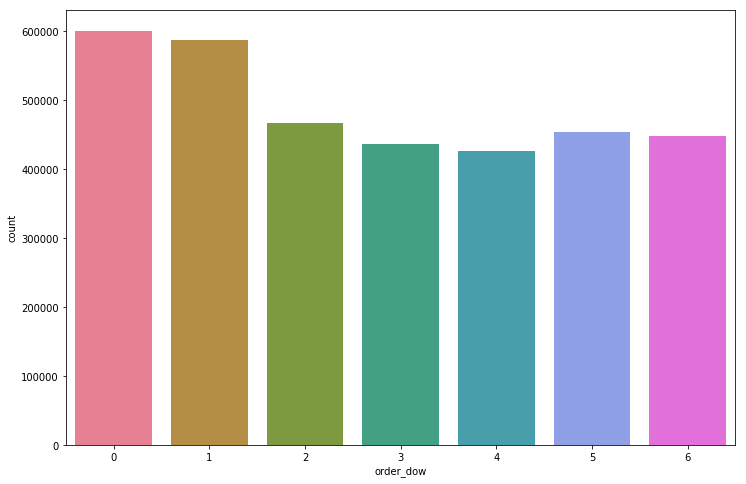

In [7]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_dow", data=ordersDOW,palette='husl')

1)	When do customers order the most?- Time of the day

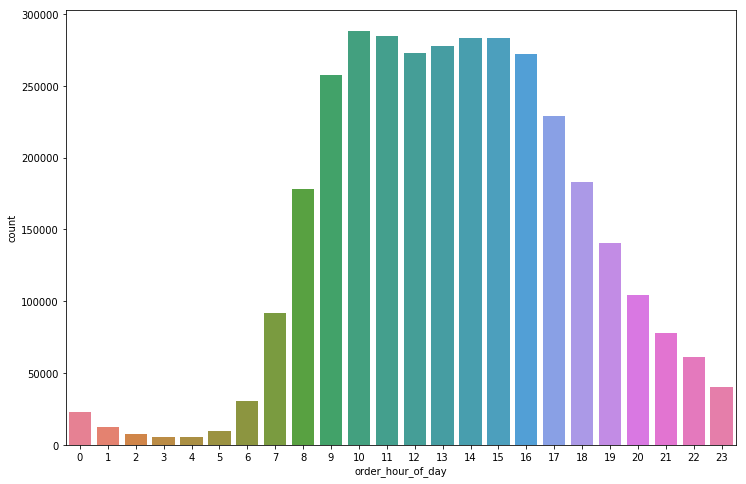

In [8]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x="order_hour_of_day", data=ordersDOW,palette='husl')

In [5]:
priorOrder=pd.read_csv(datapath+"order_products_prior.csv")
trainOrder=pd.read_csv(datapath+"order_products_train.csv")

In [10]:
ordersDOW['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [7]:
priorOrder.head(1)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1


1)	When do customers order the most?- -	Combination of the above two

In [12]:
ordersDOW['order_dow'].value_counts()

0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: order_dow, dtype: int64

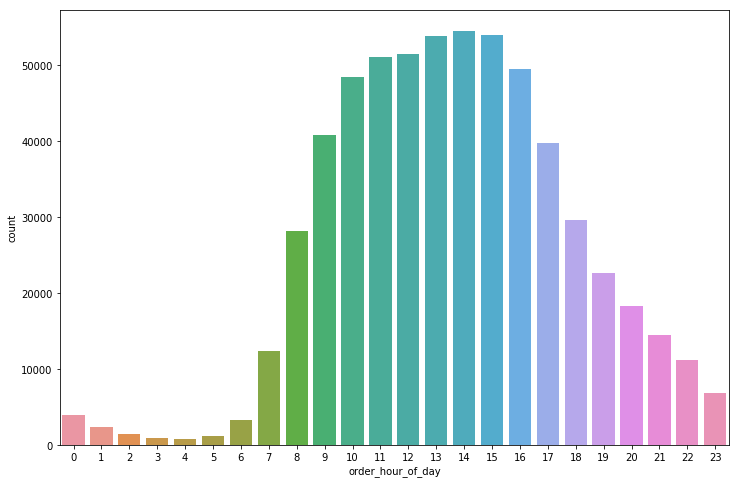

In [13]:
# Orders placed on Sunday vs time 
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==0])

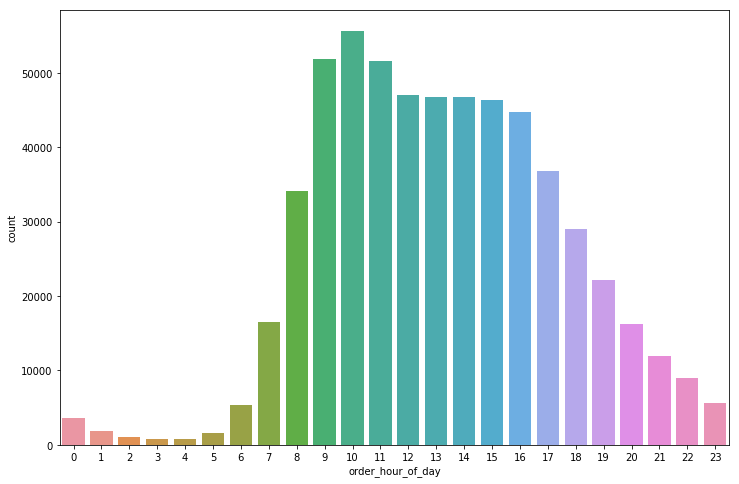

In [14]:
# Orders placed on Monday vs time 
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==1])

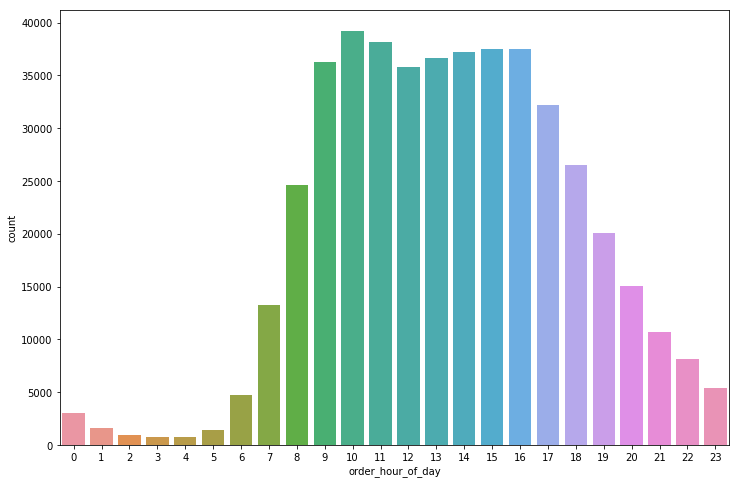

In [15]:
# Orders placed on Tuesday vs time 
plt.figure(figsize=(12,8))
ax=sns.countplot(x='order_hour_of_day',data=orders[orders['order_dow']==2])

In [16]:
# Grouping orders by DOW, Days, Total Orders
groupedDOW = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()

# Create a pivot for the results
groupedDOW=groupedDOW.pivot("order_dow", "order_hour_of_day","order_number")
groupedDOW.head(2)


order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620


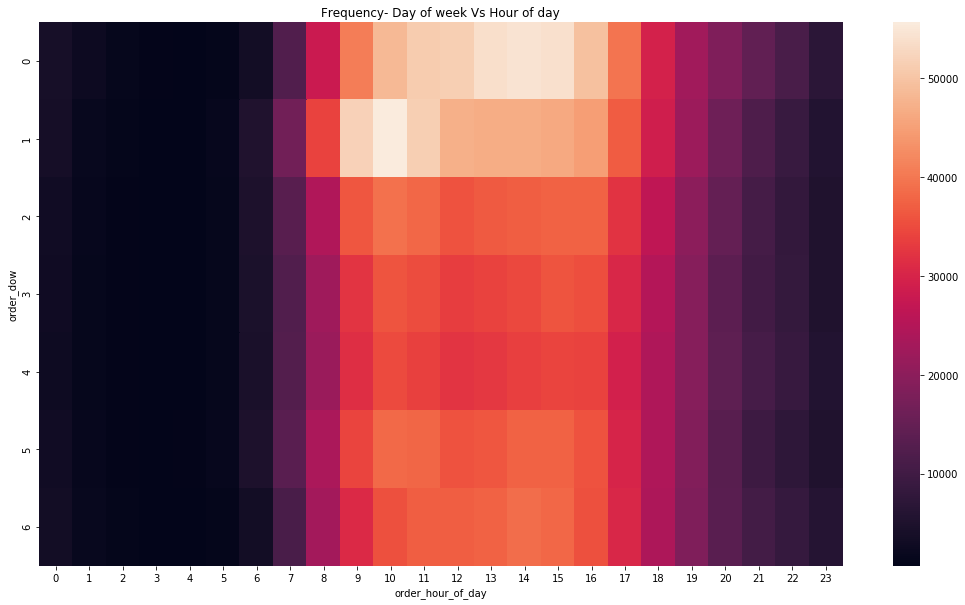

In [17]:
plt.figure(figsize=(18,10))

sns.heatmap(groupedDOW)
plt.title("Frequency- Day of week Vs Hour of day")
plt.show()

The above graph shows that most of the orders from the customers are placed between 8 AM and 5 PM

In [18]:
# Percentage of products re-ordered in the Prior Orders
(priorOrder.reordered.sum() / len(priorOrder))*100

58.969746679221615

In [19]:
# Percentage of products re-ordered in the Train Orders
(trainOrder.reordered.sum() / len(trainOrder))*100

59.859441275096295

2)	What are the top 5 products?
-	That are ordered.
-	That are reordered.

To find the top 5 products ordered online- Merge prior orders with products, departments and aisles and plot a graph between the product names and the counts of products ordered

In [6]:
# Merge priorOrders and Products
priorOrderMerged=pd.merge(priorOrder,products,on='product_id',how='left')

In [7]:
priorOrderMerged.head(2)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4


In [7]:
# Merge priorOrdersMerged and Aisles, Departments
priorOrderMerged=pd.merge(priorOrderMerged,departments,on='department_id',how='left')

In [8]:
priorOrderMerged=pd.merge(priorOrderMerged,aisles,on='aisle_id',how='left')

In [10]:
priorOrderMerged.head(1)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs


In [11]:
ProductsCount = priorOrderMerged['product_name'].value_counts().head(5).reset_index()
ProductsCount.columns=['Product-Name','TotalOrdered-Frequency']
ProductsCount.head(2)

,Product-Name,TotalOrdered-Frequency
0,Banana,472565
1,Bag of Organic Bananas,379450


In [15]:
ProductsCount.shape

(5, 2)

In [16]:
type(ProductsCount)

pandas.core.frame.DataFrame

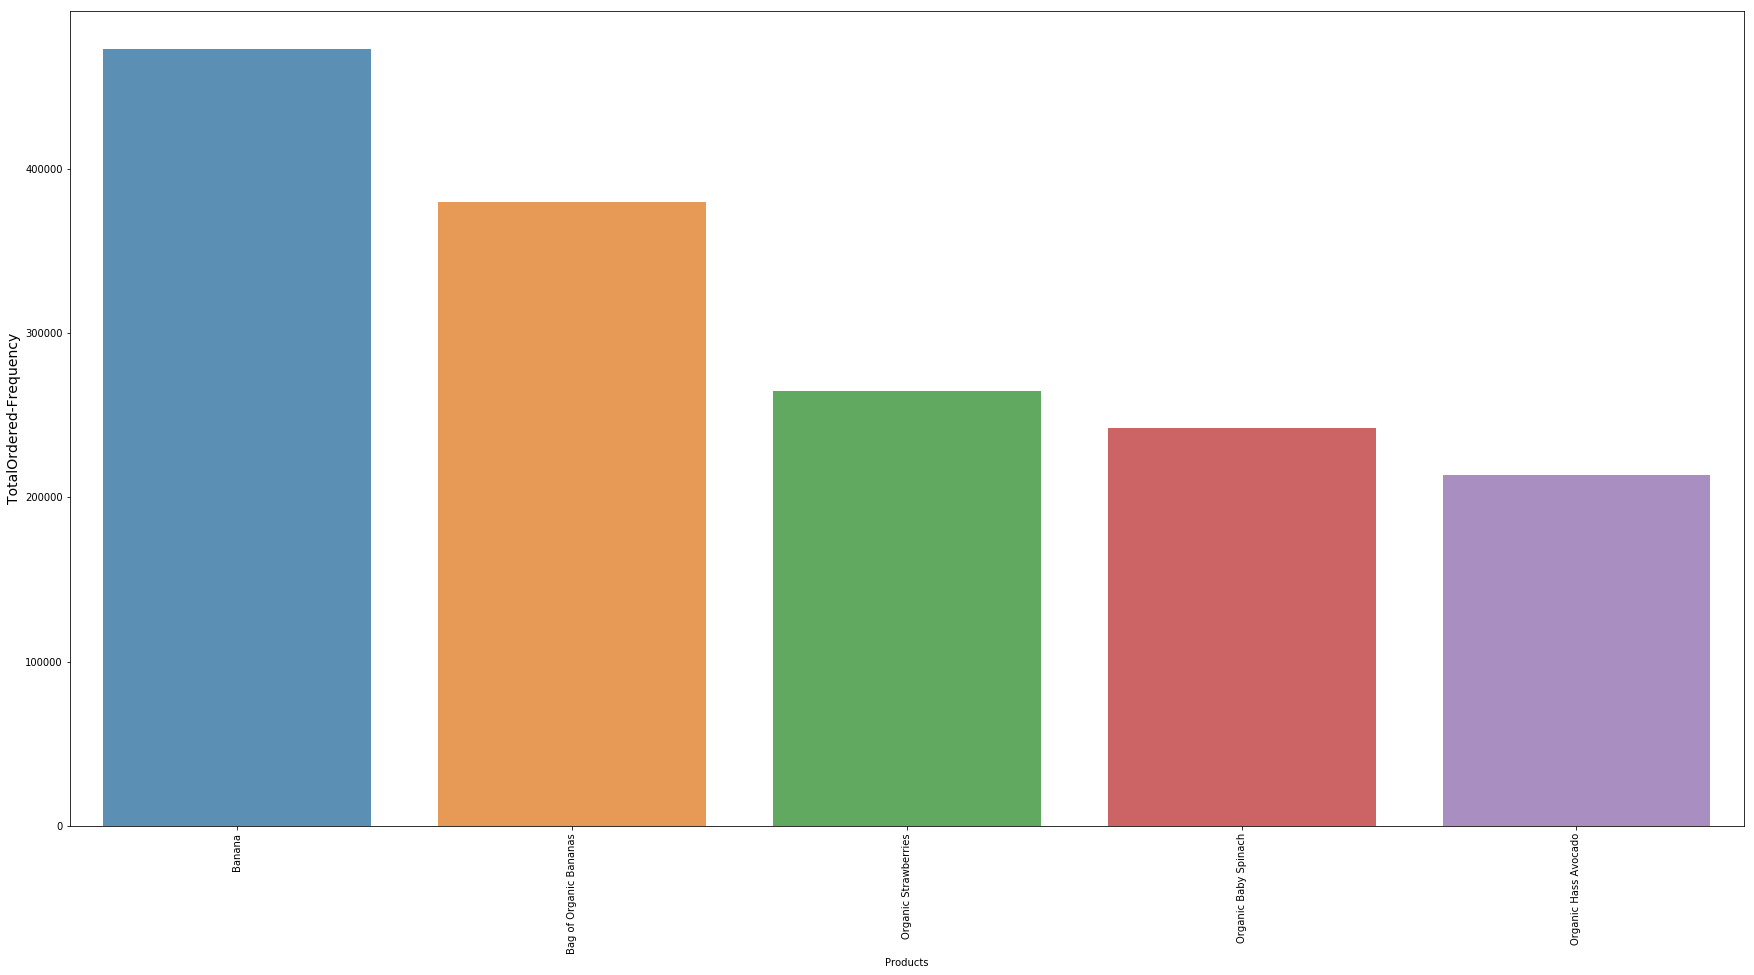

In [34]:
plt.figure(figsize=(30,15))
sns.barplot(ProductsCount['Product-Name'], ProductsCount['TotalOrdered-Frequency'], alpha=0.8)
plt.ylabel('TotalOrdered-Frequency', fontsize=14)
plt.xlabel('Products', fontsize=10)
plt.xticks(rotation='vertical')
plt.show()

In [74]:
ProductsCount = priorOrderMerged.groupby('product_name')['reordered'].aggregate("sum").nlargest(5).reset_index()

In [75]:
ProductsCount.columns=['Product-Name','Total Re-Ordered']
ProductsCount

,Product-Name,Total Re-Ordered
0,Banana,398609
1,Bag of Organic Bananas,315913
2,Organic Strawberries,205845
3,Organic Baby Spinach,186884
4,Organic Hass Avocado,170131


In [76]:
type(ProductsCount)

pandas.core.frame.DataFrame

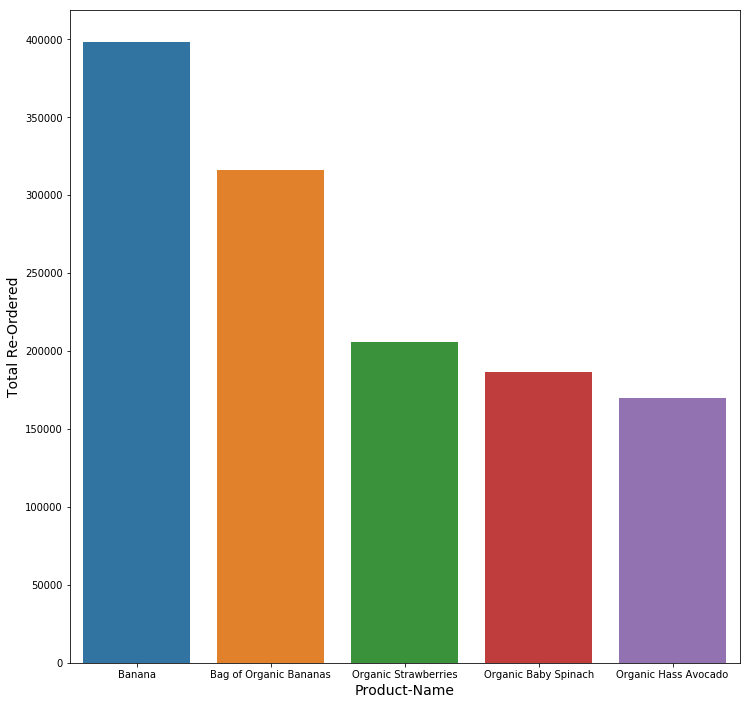

In [78]:
# Top 5 Products Re-Ordered
plt.figure(figsize=(12,12))
sns.barplot(ProductsCount['Product-Name'], ProductsCount['Total Re-Ordered'])
plt.ylabel('Total Re-Ordered', fontsize=14)
plt.xlabel('Product-Name', fontsize=14)
plt.show()

In [83]:
# Delete unwanted dataframes
del([ordersDOW,groupedDOW,ProductsCount])

In [13]:
orders.head(1)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN


In [9]:
priorOrderMergedOrders=pd.merge(priorOrderMerged,orders,on='order_id',how='left')

In [18]:
priorOrderMergedOrders.head(1)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,eggs,202279,prior,3,5,9,8.0


In [10]:
#How many times a product is reordered by the user using reordered
#How frequent the user places order for a particular product using dow
#In how many days user places the orders using days since prior order
priorOrderMergedOrdersT=priorOrderMergedOrders.groupby(["user_id","product_id","order_id"]).aggregate(
    {"order_dow":"median","days_since_prior_order":"median","reordered":"sum"}).reset_index()

In [11]:
priorOrderMergedOrdersT.head(1)

,user_id,product_id,order_id,order_dow,days_since_prior_order,reordered
0,1,196,431534,4,28.0,1


In [12]:
priorOrderMergedOrdersT['days_since_prior_order'].fillna(0,inplace=True)

In [13]:
priorOrderMergedOrdersT.isna().any()

user_id                   False
product_id                False
order_id                  False
order_dow                 False
days_since_prior_order    False
reordered                 False
dtype: bool

In [14]:
priorOrderMergedOrdersT.rename(index=str,columns={"reordered":'Total-ReOrdered'},inplace=True)

In [15]:
priorOrderMergedOrdersT['Reordered']=[0 if x==0 else 1 for x in priorOrderMergedOrdersT['Total-ReOrdered']]

In [20]:
priorOrderMergedOrdersT.head(10)

,user_id,product_id,order_id,order_dow,days_since_prior_order,Total-ReOrdered,Reordered
0,1,196,431534,4,28.0,1,1
1,1,196,473747,3,21.0,1,1
2,1,196,550135,1,20.0,1,1
3,1,196,2254736,4,29.0,1,1
4,1,196,2295261,1,0.0,1,1
5,1,196,2398795,3,15.0,1,1
6,1,196,2539329,2,0.0,0,0
7,1,196,2550362,4,30.0,1,1
8,1,196,3108588,1,14.0,1,1
9,1,196,3367565,2,19.0,1,1


In [17]:
priorOrderMergedOrdersT['Reordered'].value_counts()

1    19126536
0    13307953
Name: Reordered, dtype: int64

In [182]:
trainOrder.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [18]:
# Bring the trainOrders as PriorOrders

# Merge trainOrders and Products
trainOrderMerged=pd.merge(trainOrder,products,on='product_id',how='left')

In [19]:
# Merge trainOrdersMerged and Aisles, Departments
trainOrderMerged=pd.merge(trainOrderMerged,departments,on='department_id',how='left')
trainOrderMerged=pd.merge(trainOrderMerged,aisles,on='aisle_id',how='left')
trainOrderMergedOrders=pd.merge(trainOrderMerged,orders,on='order_id',how='left')

In [21]:
#How many times a product is reordered by the user using reordered
#How frequent the user places order for a particular product using dow
#In how many days user places the orders using days since prior order
trainOrderMergedOrdersT=trainOrderMergedOrders.groupby(["user_id","product_id","order_id"]).aggregate(
    {"order_dow":"median","days_since_prior_order":"median","reordered":"sum"}).reset_index()

In [22]:
trainOrderMergedOrdersT['days_since_prior_order'].fillna(0,inplace=True)
trainOrderMergedOrdersT.rename(index=str,columns={"reordered":'Total-ReOrdered'},inplace=True)

In [23]:
trainOrderMergedOrdersT['Reordered']=[0 if x==0 else 1 for x in trainOrderMergedOrdersT['Total-ReOrdered']]
trainOrderMergedOrdersT['Reordered'].value_counts()

1    828824
0    555793
Name: Reordered, dtype: int64

In [21]:
trainOrderMergedOrdersT.head(5)

,user_id,product_id,order_dow,days_since_prior_order,Total-ReOrdered,Reordered2
0,1,196,4,14.0,1,1
1,1,10258,4,14.0,1,1
2,1,13032,4,14.0,1,1
3,1,25133,4,14.0,1,1
4,1,26088,4,14.0,1,1


In [33]:
trainOrderMergedOrdersT['Total-ReOrdered'].value_counts()

1    828824
0    555793
Name: Total-ReOrdered, dtype: int64

In [102]:
priorOrderMergedOrdersT.head(50)

,user_id,product_id,order_dow,days_since_prior_order,Total-ReOrdered,Reordered
0,1,196,2.5,20.0,9,1
1,1,10258,3.0,20.0,8,1
2,1,10326,4.0,28.0,0,0
3,1,12427,2.5,20.0,9,1
4,1,13032,3.0,20.0,2,1
5,1,13176,3.5,21.5,1,1
6,1,14084,2.0,0.0,0,0
7,1,17122,4.0,28.0,0,0
8,1,25133,2.5,20.5,7,1
9,1,26088,2.5,15.0,1,1


In [24]:
trainOrderMergedOrdersT.rename(index=str,columns={"Reordered":'Reordered2'},inplace=True)

In [25]:
priorTrainM=pd.merge(priorOrderMergedOrdersT,trainOrderMergedOrdersT,on=['user_id','product_id','order_id'],how='outer')

In [22]:
X=trainOrderMergedOrdersT[trainOrderMergedOrdersT['user_id']==1]

In [23]:
Y=priorOrderMergedOrdersT[priorOrderMergedOrdersT['user_id']==1]

In [80]:
XY=pd.merge(Y,X,on=['user_id','product_id'],how='outer')

In [26]:
priorTrainM['order_dow_x'].fillna('None',inplace=True)
priorTrainM['order_dow_y'].fillna('None',inplace=True)

In [27]:
priorTrainM['days_since_prior_order_x'].fillna(0,inplace=True)
priorTrainM['days_since_prior_order_y'].fillna(0,inplace=True)

In [28]:
priorTrainM['Total-ReOrdered_y'].fillna(0,inplace=True)
priorTrainM['Total-ReOrdered_x'].fillna(0,inplace=True)

In [29]:
priorTrainM['Reordered'].fillna('None',inplace=True)
priorTrainM['Reordered2'].fillna('None',inplace=True)

In [30]:
pdt = {c:i for i,c in enumerate(priorTrainM['product_id'].unique())}
priorTrainM['pid_new'] = [float(pdt[t]) for t in priorTrainM.product_id]

In [31]:
priorTrainM

,user_id,product_id,order_id,order_dow_x,days_since_prior_order_x,Total-ReOrdered_x,Reordered,order_dow_y,days_since_prior_order_y,Total-ReOrdered_y,Reordered2,pid_new
0,1,196,431534,4,28.0,1.0,1,None,0.0,0.0,None,0.0
1,1,196,473747,3,21.0,1.0,1,None,0.0,0.0,None,0.0
2,1,196,550135,1,20.0,1.0,1,None,0.0,0.0,None,0.0
3,1,196,2254736,4,29.0,1.0,1,None,0.0,0.0,None,0.0
4,1,196,2295261,1,0.0,1.0,1,None,0.0,0.0,None,0.0
5,1,196,2398795,3,15.0,1.0,1,None,0.0,0.0,None,0.0
6,1,196,2539329,2,0.0,0.0,0,None,0.0,0.0,None,0.0
7,1,196,2550362,4,30.0,1.0,1,None,0.0,0.0,None,0.0
8,1,196,3108588,1,14.0,1.0,1,None,0.0,0.0,None,0.0
9,1,196,3367565,2,19.0,1.0,1,None,0.0,0.0,None,0.0


In [32]:
priorTrainM['order_dow_x'].value_counts()

0.0     6209666
1.0     5665856
6.0     4500304
2.0     4217798
5.0     4209533
3.0     3844117
4.0     3787215
None    1384617
Name: order_dow_x, dtype: int64

In [33]:
pdt = {c:i for i,c in enumerate(priorTrainM['order_dow_x'].unique())}
priorTrainM['DOW_PRIOR'] = [float(pdt[t]) for t in priorTrainM.order_dow_x]

In [34]:
priorTrainM['order_dow_y'].value_counts()

None    32434489
0.0       324026
6.0       207279
1.0       205978
5.0       176910
2.0       160562
4.0       155481
3.0       154381
Name: order_dow_y, dtype: int64

In [35]:
pdt = {c:i for i,c in enumerate(priorTrainM['order_dow_y'].unique())}
priorTrainM['DOW_PRESENT'] = [float(pdt[t]) for t in priorTrainM.order_dow_y]

In [36]:
priorTrainM['Reordered'].value_counts()

1.0     19126536
0.0     13307953
None     1384617
Name: Reordered, dtype: int64

In [37]:
pdt = {c:i for i,c in enumerate(priorTrainM['Reordered'].unique())}
priorTrainM['REORDER_PRIOR'] = [float(pdt[t]) for t in priorTrainM.Reordered]

In [38]:
priorTrainM['Reordered2'].value_counts()

None    32434489
1.0       828824
0.0       555793
Name: Reordered2, dtype: int64

In [39]:
pdt = {c:i for i,c in enumerate(priorTrainM['Reordered2'].unique())}
priorTrainM['REORDER_PRESENT'] = [float(pdt[t]) for t in priorTrainM.Reordered2]

In [40]:
priorTrainM['Total-ReOrdered_x'].value_counts()

1.0    19126536
0.0    14692570
Name: Total-ReOrdered_x, dtype: int64

In [41]:
priorTrainM['Total-ReOrdered_y'].value_counts()

0.0    32990282
1.0      828824
Name: Total-ReOrdered_y, dtype: int64

In [42]:
priorTrainM.drop(columns=['Reordered2','Reordered','order_dow_x','order_dow_y','product_id'],inplace=True)

In [43]:
priorTrainM.head()

,user_id,order_id,days_since_prior_order_x,Total-ReOrdered_x,days_since_prior_order_y,Total-ReOrdered_y,pid_new,DOW_PRIOR,DOW_PRESENT,REORDER_PRIOR,REORDER_PRESENT
0,1,431534,28.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,473747,21.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,550135,20.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
3,1,2254736,29.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,2295261,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [44]:
priorTrainM['Reordered']=[0 if x<1 else 1 for x in priorTrainM['REORDER_PRIOR']]

In [45]:
priorTrainM.head()

,user_id,order_id,days_since_prior_order_x,Total-ReOrdered_x,days_since_prior_order_y,Total-ReOrdered_y,pid_new,DOW_PRIOR,DOW_PRESENT,REORDER_PRIOR,REORDER_PRESENT,Reordered
0,1,431534,28.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,473747,21.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1,550135,20.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0
3,1,2254736,29.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1,2295261,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [47]:
priorTrainMcopy=priorTrainM.copy()

In [48]:
priorTrainMy=priorTrainMcopy['Reordered']

In [49]:
priorTrainMx=priorTrainMcopy.drop(columns=['Reordered'])

In [50]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(priorTrainMx,priorTrainMy,test_size=0.3,random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(Xtrain,Ytrain)
Ypred=reg.predict(Xtest)

In [171]:
print('Accuracy',accuracy_score(Ytest,Ypred))

Accuracy 1.0


In [172]:
list(zip(Ytest,Ypred))

[(0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0)]

In [173]:
Ypred.size

6